# TP FINAL - Grupo 9 - CLASIFICACIÓN: KNN, NB, Regresión Logística 

#### Importamos las librerías

In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns


# Modelos de Clasificación
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score, KFold
from sklearn.model_selection import StratifiedKFold

# Evaluación de modelos
# ==============================================================================
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler


## Análisis Exploratorio

#### Importamos el dataset y realizamos un análisis exploratorio del mismo.

In [2]:
data_location = './Data/All_tipos.csv'
df_virus = pd.read_csv(data_location)

df_virus.head()

,hash,tipo,fs_size,raw_size,file_extension,cantidad_procesos,cantidad_procesos_red,cantidad_objetos,cantidad_DLLs,cantidad_acciones_registros,ATTEMPT_TO_COPY_ITSELF,ATTEMPT_TO_EXECUTE_AFTER_RENAME,VBA_ATTEMPT_TO_CALL_API,IMAGE_HAS_SHARED_MEMORY_SECTION,HEUR_APPLICATION_CONTAINS_RUNTIME_DATA,INTERNAL_HAS_JAVA_CLASS_EXTRACT
0,00883eb40a25c5401b7b82c63d485f6006cf6251,Backdoors,733630,0,exe,1,0,2,53,5,5,2,0,0,0,2
1,0157e0df4dfcb63e10d7c173a5304e26d11dc708,Backdoors,36817155,5741568,exe,6,0,24,263,25,6,4,1,6,65,0
2,05704f6ea9470096a8642ea1f1ba165c2d79cf53,Backdoors,380928,0,dll,2,0,0,5,0,4,0,7,2,0,4
3,06cd99dbda1662c2cfc279d0a93e3cad49dad958,Backdoors,3094987,54272,exe,7,0,4,156,12,5,7,6,7,590,0
4,087ce02c20903ebe83535f95a8ff2919de732fe1,Backdoors,2029026,5120,exe,7,3,0,134,25,2,6,5,1,312,3


In [3]:
# ¿Cuántas observaciones hay en la tabla? 
df_virus.shape

(1485, 16)

In [4]:
# ¿Tenemos datos faltantes?
df_virus.isna().info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   hash                                    1485 non-null   bool 
 1   tipo                                    1485 non-null   bool 
 2   fs_size                                 1485 non-null   bool 
 3   raw_size                                1485 non-null   bool 
 4   file_extension                          1485 non-null   bool 
 5   cantidad_procesos                       1485 non-null   bool 
 6   cantidad_procesos_red                   1485 non-null   bool 
 7   cantidad_objetos                        1485 non-null   bool 
 8   cantidad_DLLs                           1485 non-null   bool 
 9   cantidad_acciones_registros             1485 non-null   bool 
 10  ATTEMPT_TO_COPY_ITSELF                  1485 non-null   bool 
 11  ATTEMPT_TO_EXECUT

In [5]:
#Cantidad de variables target
df_virus['tipo'].unique()

array(['Backdoors', 'Downloader', 'Dropper', 'Filecoder', 'Riskware'],
      dtype=object)

In [6]:
# ¿Cómo se distribuye las variables target?
df_virus['tipo'].value_counts(normalize=True)

Dropper       0.363636
Downloader    0.290909
Filecoder     0.143434
Backdoors     0.120539
Riskware      0.081481
Name: tipo, dtype: float64

In [7]:
# ¿Dentro de qué rango se encuentran las variables?
df_virus.describe()

,fs_size,raw_size,cantidad_procesos,cantidad_procesos_red,cantidad_objetos,cantidad_DLLs,cantidad_acciones_registros,ATTEMPT_TO_COPY_ITSELF,ATTEMPT_TO_EXECUTE_AFTER_RENAME,VBA_ATTEMPT_TO_CALL_API,IMAGE_HAS_SHARED_MEMORY_SECTION,HEUR_APPLICATION_CONTAINS_RUNTIME_DATA,INTERNAL_HAS_JAVA_CLASS_EXTRACT
count,1.485000e+03,1.485000e+03,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,3.021759e+07,3.167315e+06,5.832997,2.455219,12.032323,195.486195,118.557576,2.728620,4.253199,9.257239,8.259933,270.480135,1.824242
std,3.951022e+07,5.978435e+06,7.427393,6.542226,16.386431,246.837503,244.578677,3.117168,6.959490,10.886319,11.240679,332.883739,1.796434
min,2.621440e+05,0.000000e+00,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.547159e+06,0.000000e+00,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,1.000000,2.000000,1.000000,0.000000,0.000000
50%,5.609653e+06,3.840000e+04,3.000000,1.000000,7.000000,154.000000,25.000000,2.000000,2.000000,4.000000,3.000000,50.000000,1.000000
75%,5.812544e+07,5.438176e+06,10.000000,2.000000,19.000000,264.000000,58.000000,5.000000,4.000000,14.000000,9.000000,548.000000,3.000000
max,2.290279e+08,9.028045e+07,91.000000,103.000000,190.000000,4003.000000,2022.000000,13.000000,70.000000,43.000000,69.000000,1000.000000,5.000000


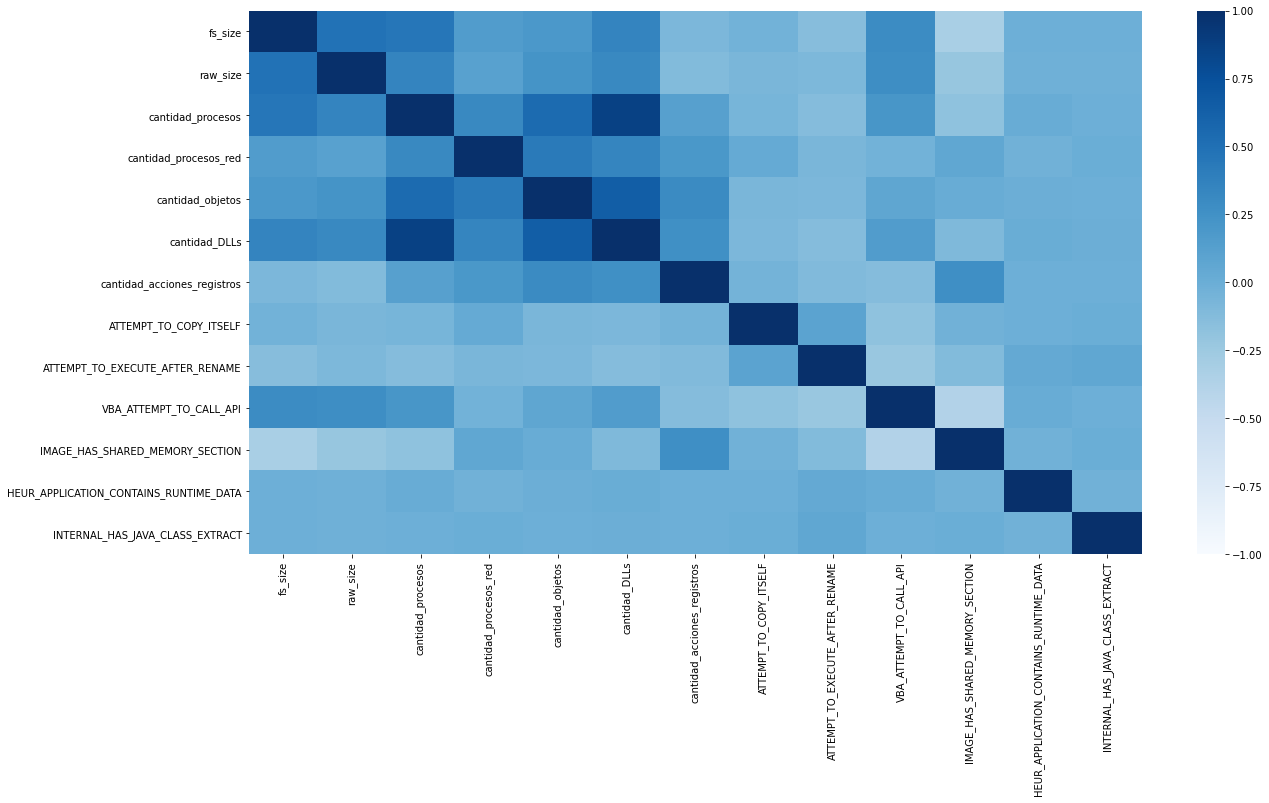

In [8]:
# ¿Qué variables están más correlacionadas?
plt.figure(figsize=(20,10))
sns.heatmap(df_virus.corr(), annot=False, vmin=-1, cmap='Blues');
#Cantidad de DDL tiene una correlación cercana a 1 con cantidad_DLL (lo dejamos a priori para mantener la mayor cantidad de features)

### Preparación de Datos

In [9]:
# Eliminamos los registros que no son numéricos
df_numericals = df_virus.drop(['hash', 'tipo', 'file_extension'],axis=1)

In [10]:
#Reemplazamos las etiquetas categóricas por numéricas
to_replace = ['Backdoors', 'Downloader', 'Dropper', 'Filecoder', 'Riskware']
replace_to = [0,1,2,3,4]
target = df_virus['tipo'].replace(to_replace = to_replace, value = replace_to)
target.value_counts(normalize=True)

2    0.363636
1    0.290909
3    0.143434
0    0.120539
4    0.081481
Name: tipo, dtype: float64

In [11]:
# Preparamos la matriz de features y el vector objetivo
X = df_numericals
y = target

In [12]:
# Separamos un set de testeo para evaluar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 0)

## Clasificación

### Regresión Logística

In [13]:
# Estandarizamos los datos para que la regularización sea correcta
scaler = StandardScaler()
X_train_std_lr = scaler.fit_transform(X_train)
X_test_std_lr = scaler.transform(X_test)

In [14]:
# Ajuste del Modelo

lr = LogisticRegression()

lr.fit(X_train_std_lr, y_train)

LogisticRegression()

In [15]:
# Evaluación del Modelo
accuracy_score(y_train, lr.predict(X_train_std_lr))

0.7915543575920935

In [16]:
# Evaluación del Modelo Test
accuracy_score(y_test, lr.predict(X_test_std_lr))

0.8279569892473119

Text(33.0, 0.5, 'Reales')

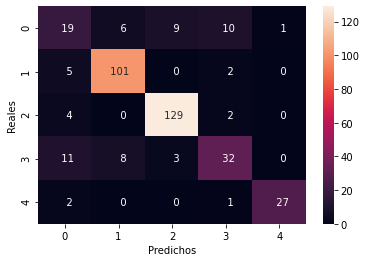

In [17]:
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test_std_lr)), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

### KNN

In [18]:
# Estandarizamos los datos para que la regularización sea correcta
scaler = StandardScaler()
X_train_std_knn = scaler.fit_transform(X_train)
X_test_std_knn = scaler.transform(X_test)

In [19]:
# Verificamos que las variables ahora tengan media 0 y desvío estandar 1
print('Medias:', np.mean(X_train_std_knn, axis=0).round(2))
print('Desvio:', np.std(X_train_std_knn, axis=0).round(2))

Medias: [ 0.  0.  0.  0.  0. -0.  0. -0. -0. -0.  0. -0. -0.]
Desvio: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [20]:
#Generamos un modelo KNN con los datos normalizados

from sklearn.model_selection import cross_val_score, KFold

# Usamos cross validation con 5 folds
kf = KFold(n_splits=5, shuffle=True, random_state=12)

scores_para_df = []

for i in range(1, 26):
    
    # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
    model = KNeighborsClassifier(n_neighbors=i)
    
    # cross_val_scores nos devuelve un array de 5 resultados,
    # uno por cada partición que hizo automáticamente CV
    cv_scores = cross_val_score(model, X_train_std_knn, y_train, cv=kf)
    
    # Para cada valor de n_neighbours, creamos un diccionario con el valor
    # de n_neighbours y la media de los scores
    dict_row_score = {'score_medio':np.mean(cv_scores), 'n_neighbors':i}
    
    # Guardamos cada uno en la lista de diccionarios
    scores_para_df.append(dict_row_score)

In [21]:
# Creamos el DataFrame a partir de la lista de diccionarios
df_scores = pd.DataFrame(scores_para_df)

In [22]:
# Obtenemos una nueva lista con el accuracy promedio para cada valor de K
df_scores.head(3)

,score_medio,n_neighbors
0,0.811312,1
1,0.798727,2
2,0.814891,3


In [23]:
#Averiguamos el valor de 'neighbors'que maximiza el score_medio
df_scores.loc[df_scores.score_medio == df_scores.score_medio.max()]

,score_medio,n_neighbors
2,0.814891,3


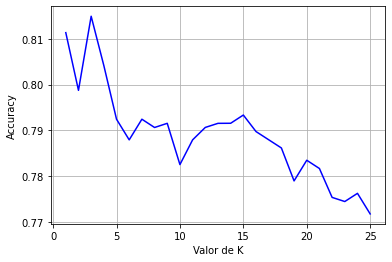

In [24]:
#Graficamos la media por cada n_neighbors
plt.plot(df_scores['n_neighbors'], df_scores['score_medio'], color='b')
plt.xlabel('Valor de K'); plt.ylabel('Accuracy')
plt.grid(); plt.show()

In [25]:
# GridSearch para KNN

knn = KNeighborsClassifier()

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

folds=StratifiedKFold(n_splits=10, random_state=12, shuffle=True)

grid_knn = GridSearchCV(knn, param_grid, cv=folds, scoring='accuracy')

grid_knn.fit(X_train_std_knn, y_train)

grid_knn.best_estimator_

KNeighborsClassifier(n_neighbors=3)

In [26]:
# Asignamos el valor del k óptimo a una variable
best_k = df_scores.loc[df_scores.score_medio == df_scores.score_medio.max(),'n_neighbors'].values[0]
best_k

3

In [27]:
# Elegimos el modelo óptimo que nos había indicado cross validation
knn = KNeighborsClassifier(n_neighbors=best_k)

# Lo ajustamos sobre datos de entrenamiento
knn.fit(X_train_std_knn, y_train)

KNeighborsClassifier(n_neighbors=3)

In [28]:
# Evaluamos qué accuracy obtenemos en train
accuracy_score(y_train, knn.predict(X_train_std_knn))

0.89937106918239

In [29]:
# Lo utilizamos para predecir en test
y_pred_knn = knn.predict(X_test_std_knn)

In [30]:
# Computamos el accuracy score en test
accuracy_score(y_test, y_pred_knn)

0.7956989247311828

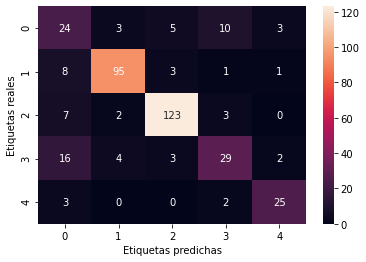

In [31]:
# Graficamos la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

### Naive Bayes Gaussiano

In [32]:
# Estandarizamos los datos para que la regularización sea correcta
scaler = StandardScaler()
X_train_std_nb = scaler.fit_transform(X_train)
X_test_std_nb = scaler.transform(X_test)

In [33]:
# Instanciamos y entrenamos un modelo naive bayes gaussiano
gnb = GaussianNB()

gnb.fit(X_train_std_nb, y_train)

GaussianNB()

In [34]:
# Evaluamos qué accuracy obtenemos en train
accuracy_score(y_train, gnb.predict(X_train_std_nb))

0.7897574123989218

In [35]:
# Utilizamos el modelo para predecir la etiqueta de los datos de test
y_pred_nb = gnb.predict(X_test_std_nb)

y_pred_nb

array([2, 1, 0, 2, 3, 2, 4, 2, 1, 4, 2, 2, 4, 0, 2, 3, 3, 0, 2, 2, 2, 3,
       0, 1, 2, 1, 2, 2, 3, 4, 4, 0, 1, 1, 2, 2, 2, 1, 2, 3, 0, 1, 4, 2,
       2, 1, 2, 4, 2, 1, 1, 1, 3, 2, 4, 1, 0, 0, 2, 1, 0, 4, 1, 2, 2, 0,
       2, 3, 1, 0, 2, 1, 4, 1, 4, 1, 2, 0, 2, 0, 2, 2, 4, 3, 4, 2, 1, 2,
       2, 2, 4, 1, 0, 0, 2, 2, 4, 1, 1, 2, 4, 1, 3, 1, 4, 0, 1, 0, 2, 0,
       3, 2, 2, 0, 4, 0, 1, 2, 2, 2, 2, 4, 4, 0, 3, 2, 2, 2, 3, 2, 2, 4,
       1, 1, 2, 1, 2, 2, 4, 4, 2, 2, 2, 4, 0, 1, 0, 0, 2, 2, 1, 4, 1, 1,
       2, 3, 0, 1, 0, 2, 2, 1, 2, 1, 3, 3, 0, 3, 2, 0, 2, 2, 2, 2, 0, 4,
       1, 1, 4, 2, 0, 3, 0, 4, 2, 4, 2, 2, 2, 2, 1, 4, 0, 3, 1, 1, 2, 1,
       2, 1, 2, 4, 1, 2, 1, 2, 4, 2, 1, 2, 3, 1, 2, 2, 2, 0, 2, 4, 3, 3,
       1, 2, 1, 1, 1, 4, 0, 3, 1, 1, 2, 4, 1, 4, 0, 0, 2, 3, 2, 3, 2, 2,
       2, 1, 1, 2, 2, 2, 4, 2, 4, 0, 2, 2, 3, 1, 0, 2, 0, 2, 2, 4, 2, 4,
       0, 2, 1, 2, 0, 4, 4, 0, 1, 1, 0, 2, 1, 1, 2, 1, 1, 4, 2, 0, 1, 1,
       1, 1, 1, 1, 2, 1, 0, 0, 2, 4, 0, 3, 3, 1, 1,

In [36]:
# Computamos el accuracy score en test
accuracy_score(y_test, y_pred_nb)

0.8064516129032258

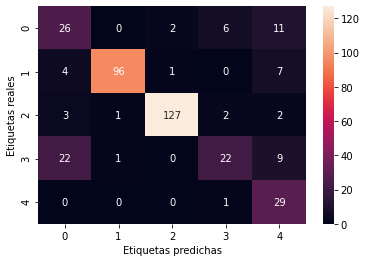

In [37]:
# Graficamos la matriz de confusión
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='.0f')
plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas');

## Evaluación de Modelos

### Calculamos la proporción de casos correctamente clasificados, la precisión y el recall.

#### KNN

In [38]:
print('Accuracy=', accuracy_score(y_test, y_pred_knn))
print('Recall=', recall_score(y_test, y_pred_knn, average='weighted'))
print('Precision=', precision_score(y_test, y_pred_knn, average='weighted'))

Accuracy= 0.7956989247311828
Recall= 0.7956989247311828
Precision= 0.8069515985050445


#### Naive Bayes 

In [39]:
print('Accuracy=', accuracy_score(y_test, y_pred_nb))
print('Recall=', recall_score(y_test, y_pred_nb,average='weighted'))
print('Precision=', precision_score(y_test, y_pred_nb, average='weighted'))

Accuracy= 0.8064516129032258
Recall= 0.8064516129032258
Precision= 0.8394511872845454


### Utilizamos los modelos entrenados para Clasificar las observaciones de los Clusters

# KNN

##### - Cluster 0

In [40]:
cluster_0 = pd.read_csv('./Data/cluster_0.csv')
cluster_0.head()

,Unnamed: 0,index,hash,pais,fs_size,raw_size,file_extension,cantidad_procesos,cantidad_procesos_red,cantidad_objetos,cantidad_DLLs,cantidad_acciones_registros,ATTEMPT_TO_COPY_ITSELF,ATTEMPT_TO_EXECUTE_AFTER_RENAME,VBA_ATTEMPT_TO_CALL_API,IMAGE_HAS_SHARED_MEMORY_SECTION,HEUR_APPLICATION_CONTAINS_RUNTIME_DATA,INTERNAL_HAS_JAVA_CLASS_EXTRACT
0,0,0,00b3fc215d496940e0353a0f39d1c60a90cd93b5,Argentina,1379555,0,exe,2,0,6,56,0,4,7,7,1,595,0
1,1,1,00d77473c837e0ed2887d6285a6c3c9e47ec83c8,Argentina,8371415,769024,exe,11,2,37,327,7,0,5,6,0,437,7
2,2,2,01daeb46e4be37bca355010139759f29b45685e6,Argentina,335884,0,dll-msil,1,0,0,1,0,8,8,5,2,600,3
3,3,3,02aff536c18147e447bf45bdb4657f209254b843,Argentina,294924,0,dll-msil,1,0,0,1,0,6,5,2,2,0,0
4,4,4,0350b28fa113b4adf4abca0e64ace0d74ff36d4d,Argentina,3717930,0,exe,5,0,15,161,46,0,7,6,0,471,0


In [41]:
X0 = cluster_0.drop(['Unnamed: 0', 'index','hash', 'pais', 'file_extension'],axis=1)
X0.head()

,fs_size,raw_size,cantidad_procesos,cantidad_procesos_red,cantidad_objetos,cantidad_DLLs,cantidad_acciones_registros,ATTEMPT_TO_COPY_ITSELF,ATTEMPT_TO_EXECUTE_AFTER_RENAME,VBA_ATTEMPT_TO_CALL_API,IMAGE_HAS_SHARED_MEMORY_SECTION,HEUR_APPLICATION_CONTAINS_RUNTIME_DATA,INTERNAL_HAS_JAVA_CLASS_EXTRACT
0,1379555,0,2,0,6,56,0,4,7,7,1,595,0
1,8371415,769024,11,2,37,327,7,0,5,6,0,437,7
2,335884,0,1,0,0,1,0,8,8,5,2,600,3
3,294924,0,1,0,0,1,0,6,5,2,2,0,0
4,3717930,0,5,0,15,161,46,0,7,6,0,471,0


In [42]:
df_numericals.columns == X0.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [43]:
knn_cluster_0 = pd.Series(knn.predict(X0))

In [44]:
knn_cluster_0.value_counts(normalize=True)

3    0.957834
1    0.042166
dtype: float64

##### - Cluster 1

In [45]:
cluster_1 = pd.read_csv('./Data/cluster_1.csv')
cluster_1.head()

,Unnamed: 0,index,hash,pais,fs_size,raw_size,file_extension,cantidad_procesos,cantidad_procesos_red,cantidad_objetos,cantidad_DLLs,cantidad_acciones_registros,ATTEMPT_TO_COPY_ITSELF,ATTEMPT_TO_EXECUTE_AFTER_RENAME,VBA_ATTEMPT_TO_CALL_API,IMAGE_HAS_SHARED_MEMORY_SECTION,HEUR_APPLICATION_CONTAINS_RUNTIME_DATA,INTERNAL_HAS_JAVA_CLASS_EXTRACT
0,0,5,03bbdba675294902cb65f6725a35ae2f84de4933,Argentina,60054931,18800384,exe,13,13,24,452,131,7,2,3,6,0,5
1,1,6,03bd40f9acf106b9f76b782697583d3109568724,Argentina,132339067,0,jar,75,8,120,2397,52,0,1,0,3,588,0
2,2,12,09e847bf5ca90043ca544e01b900ec2ce3799a8b,Argentina,60137875,18808064,exe,13,22,28,483,131,6,4,5,1,0,5
3,3,13,0a6f7d3135755e9dd24196dce9de784a8b75eb58,Argentina,53751191,16141568,exe,13,13,24,446,131,5,3,0,7,0,6
4,4,15,0aaafece1734996b96674136dfaf8e878cc114dd,Argentina,60826007,18979072,exe,13,14,26,466,130,3,4,6,7,0,0


In [46]:
X1 = cluster_1.drop(['Unnamed: 0', 'index','hash', 'pais', 'file_extension'],axis=1)
X1.head()

,fs_size,raw_size,cantidad_procesos,cantidad_procesos_red,cantidad_objetos,cantidad_DLLs,cantidad_acciones_registros,ATTEMPT_TO_COPY_ITSELF,ATTEMPT_TO_EXECUTE_AFTER_RENAME,VBA_ATTEMPT_TO_CALL_API,IMAGE_HAS_SHARED_MEMORY_SECTION,HEUR_APPLICATION_CONTAINS_RUNTIME_DATA,INTERNAL_HAS_JAVA_CLASS_EXTRACT
0,60054931,18800384,13,13,24,452,131,7,2,3,6,0,5
1,132339067,0,75,8,120,2397,52,0,1,0,3,588,0
2,60137875,18808064,13,22,28,483,131,6,4,5,1,0,5
3,53751191,16141568,13,13,24,446,131,5,3,0,7,0,6
4,60826007,18979072,13,14,26,466,130,3,4,6,7,0,0


In [47]:
knn_cluster_1 = pd.Series(knn.predict(X1))

In [48]:
knn_cluster_1.value_counts(normalize=True)

1    0.65625
3    0.34375
dtype: float64

##### - Cluster 2

In [49]:
cluster_2 = pd.read_csv('./Data/cluster_2.csv')
cluster_2.head()

,Unnamed: 0,index,hash,pais,fs_size,raw_size,file_extension,cantidad_procesos,cantidad_procesos_red,cantidad_objetos,cantidad_DLLs,cantidad_acciones_registros,ATTEMPT_TO_COPY_ITSELF,ATTEMPT_TO_EXECUTE_AFTER_RENAME,VBA_ATTEMPT_TO_CALL_API,IMAGE_HAS_SHARED_MEMORY_SECTION,HEUR_APPLICATION_CONTAINS_RUNTIME_DATA,INTERNAL_HAS_JAVA_CLASS_EXTRACT


In [50]:
X2 = cluster_2.drop(['Unnamed: 0', 'index','hash', 'pais', 'file_extension'],axis=1)
X2.head()

,fs_size,raw_size,cantidad_procesos,cantidad_procesos_red,cantidad_objetos,cantidad_DLLs,cantidad_acciones_registros,ATTEMPT_TO_COPY_ITSELF,ATTEMPT_TO_EXECUTE_AFTER_RENAME,VBA_ATTEMPT_TO_CALL_API,IMAGE_HAS_SHARED_MEMORY_SECTION,HEUR_APPLICATION_CONTAINS_RUNTIME_DATA,INTERNAL_HAS_JAVA_CLASS_EXTRACT


In [51]:
knn_cluster_2 = pd.Series(knn.predict(X2))

ValueError: Found array with 0 sample(s) (shape=(0, 13)) while a minimum of 1 is required.

In [ ]:
knn_cluster_2.value_counts(normalize=True)

# NB Gaussiano

In [ ]:
gnb_cluster_0 = pd.Series(gnb.predict(X0))
gnb_cluster_0.value_counts(normalize=True)

In [ ]:
gnb_cluster_1 = pd.Series(gnb.predict(X1))
gnb_cluster_1.value_counts(normalize=True)

# Regresión Logística

In [ ]:
lr_cluster_0 = pd.Series(lr.predict(X0))
lr_cluster_0.value_counts(normalize=True)

In [ ]:
lr_cluster_1= pd.Series(lr.predict(X1))
lr_cluster_1.value_counts(normalize=True)